# Autoregressive and moving average based models

### Summary:
* Linear regression
* Decomposition
* Holt-Winters
* Stationary test & Autocorrelation
* AR
* MA
* ARMA
* SARMA
* SARMAX Experience (exogenous variable season of the year)
* Model Best Tuning Search


### References:
* https://medium.com/@llmkhoa511/time-series-analysis-and-weather-forecast-in-python-e80b664c7f71
* https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788
* https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
* https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
* https://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/
* https://medium.com/@llmkhoa511/time-series-analysis-and-weather-forecast-in-python-e80b664c7f71

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from data_load import Data_Reader

In [2]:
load_data = Data_Reader()

In [3]:
df = load_data.get_df()

In [4]:
df.head()

,ano,janeiro,fevereiro,março,abril,maio,junho,julho,agosto,setembro,outubro,novembro,dezembro
0,2001,135.9,68.7,138.8,3.6,9.8,0.4,0.0,0.2,71.0,69.8,56.6,217.4
1,2002,49.8,12.0,67.6,54.0,28.8,0.6,0.0,0.0,87.0,113.0,119.2,85.6
2,2003,51.0,79.4,63.0,79.2,8.0,0.0,0.0,0.6,1.0,165.4,104.8,71.2
3,2004,19.4,89.4,45.2,15.4,34.4,0.0,0.0,4.2,1.0,69.0,27.2,38.0
4,2005,4.2,27.2,16.8,7.0,15.0,0.0,7.0,0.0,0.0,106.0,143.0,72.0


## MODELS TRAINING

In [5]:
mydata = load_data.transform()

In [6]:
mydata

,precipitacao
mes,
2001-01-01,135.9
2001-02-01,68.7
2001-03-01,138.8
2001-04-01,3.6
2001-05-01,9.8
...,...
2022-08-01,NaN
2022-09-01,NaN
2022-10-01,NaN


<AxesSubplot:title={'center':'Precipitação'}, xlabel='mes'>

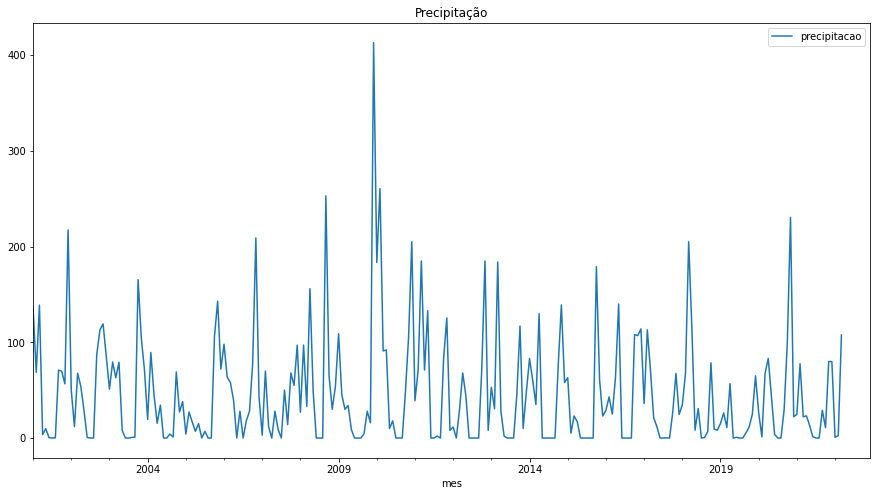

In [7]:
mydata.plot.line(figsize=(15,8), title='Precipitação')

In [8]:
# Count null values to remove
null_values = mydata.isnull().sum()
print(null_values)

precipitacao    9
dtype: int64


In [9]:
# Dropping last n rows using drop
mydata.drop(mydata.tail(null_values[0]).index, inplace = True)

In [10]:
mydata.isnull().sum()

precipitacao    0
dtype: int64

### Forecast Horizon

In [11]:
# forecast horizon variable
# 24 months forecast
fh = 24

In [12]:
# Split data into training and testing samples
data_split = load_data.test_training_split(mydata, months_test_size=fh)
train_data = data_split['train']
test_data = data_split['test']

In [13]:
train_data.tail()

,precipitacao
mes,
2019-11-01,24.8
2019-12-01,65.0
2020-01-01,26.4
2020-02-01,1.2
2020-03-01,67.4


In [14]:
train_data.shape

(231, 1)

In [15]:
test_data.tail()

,precipitacao
mes,
2021-11-01,80.0
2021-12-01,79.8
2022-01-01,0.8
2022-02-01,2.4
2022-03-01,107.6


In [16]:
test_data.shape

(24, 1)

## Linear Regression

In [17]:
x = np.arange(0, len(mydata))  # create vector
y = np.array(mydata)
X = sm.add_constant(x)

lr_model = sm.OLS(y, X)
lr = lr_model.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.822
Date:                Sun, 15 May 2022   Prob (F-statistic):              0.178
Time:                        09:16:14   Log-Likelihood:                -1397.9
No. Observations:                 255   AIC:                             2800.
Df Residuals:                     253   BIC:                             2807.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.6331      7.291      7.493      0.0

#### https://datatofish.com/statsmodels-linear-regression/
- R-squared : the coefficient of determination. It is the proportion of the variance in the dependent variable that is predictable/explained
- Adj. R-squared : Adjusted R-squared is the modified form of R-squared adjusted for the number of independent variables in the model. Value of adj. R-squared increases, when we include extra variables which actually improve the model. - 
- F-statistic : the ratio of mean squared error of the model to the mean squared error of residuals. It determines the overall significance of the model.
- coef : the coefficients of the independent variables and the constant term in the equation.
- t : the value of t-statistic. It is the ratio of the difference between the estimated and hypothesized value of a parameter, to the standard error

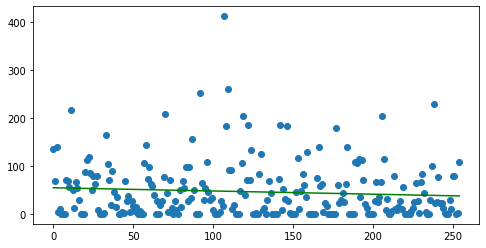

In [18]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y)

x_pred = np.linspace(x.min(), x.max(), x.shape[0])
x_pred2 = sm.add_constant(x_pred)

y_pred = lr.predict(x_pred2)

ax.plot(x_pred, y_pred, '-', color='green')

In [19]:
y_pred

array([54.63307904, 54.5660284 , 54.49897775, 54.43192711, 54.36487646,
       54.29782582, 54.23077517, 54.16372453, 54.09667388, 54.02962323,
       53.96257259, 53.89552194, 53.8284713 , 53.76142065, 53.69437001,
       53.62731936, 53.56026872, 53.49321807, 53.42616742, 53.35911678,
       53.29206613, 53.22501549, 53.15796484, 53.0909142 , 53.02386355,
       52.95681291, 52.88976226, 52.82271161, 52.75566097, 52.68861032,
       52.62155968, 52.55450903, 52.48745839, 52.42040774, 52.3533571 ,
       52.28630645, 52.2192558 , 52.15220516, 52.08515451, 52.01810387,
       51.95105322, 51.88400258, 51.81695193, 51.74990129, 51.68285064,
       51.61579999, 51.54874935, 51.4816987 , 51.41464806, 51.34759741,
       51.28054677, 51.21349612, 51.14644548, 51.07939483, 51.01234418,
       50.94529354, 50.87824289, 50.81119225, 50.7441416 , 50.67709096,
       50.61004031, 50.54298967, 50.47593902, 50.40888837, 50.34183773,
       50.27478708, 50.20773644, 50.14068579, 50.07363515, 50.00

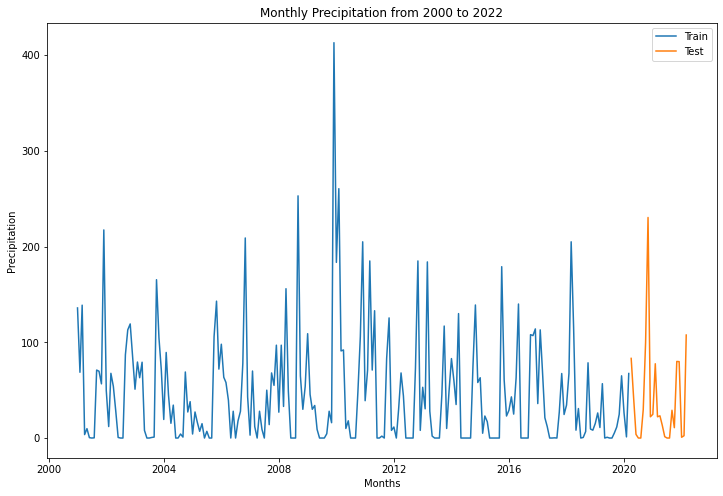

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
# plt.plot(y_pred, label='Test')
plt.title('Monthly Precipitation from 2000 to 2022')
plt.xlabel('Months')
plt.ylabel('Precipitation')
plt.legend()
plt.show()

## Holt Winters

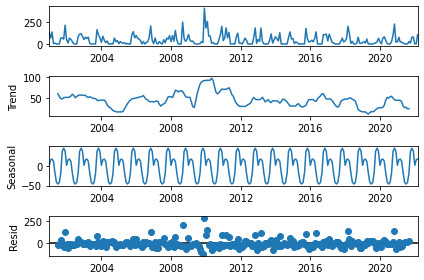

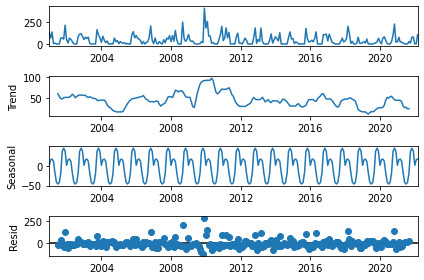

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decompose_result = seasonal_decompose(mydata, model='additive')
decompose_result.plot()

In [22]:
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error 
from sklearn.metrics import mean_absolute_error

c:\users\manuelsousa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='mes'>

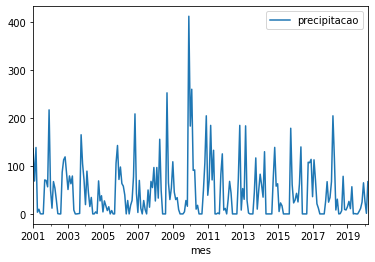

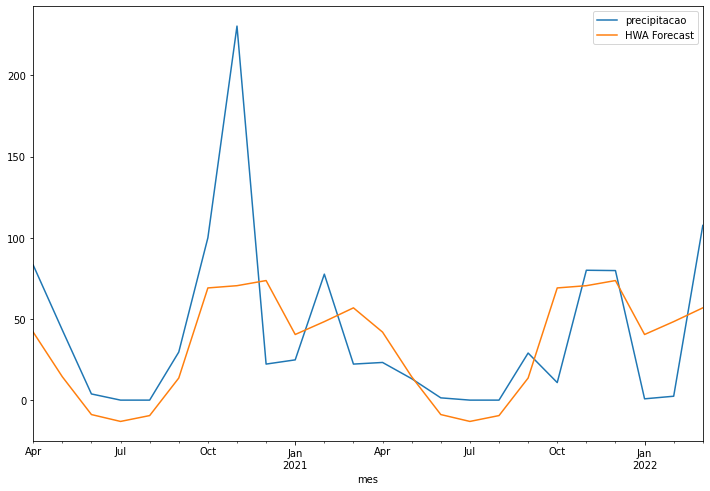

In [23]:
# Holt Winters Additive method
hwa_model = ExponentialSmoothing(train_data,
#                                  trend='add',
                                 seasonal= 'additive',
                                 seasonal_periods=12
                                ).fit()
hwa_test_pred = hwa_model.forecast(fh).rename('HWA Forecast')

train_data.plot(legend=True,label='Train')
test_data.plot(legend=True,label='Test', figsize=(12,8))
hwa_test_pred.plot(legend=True,label='HWA Forecast')

# plt.title('Train, Test and Predicted Test using Holt Winters')

In [24]:
# RMSE (HWA)
rmse_hwa = round(np.sqrt(mean_squared_error(test_data, hwa_test_pred)), 2)
print("RMSE_HWA is ", rmse_hwa)
mae_hwa = round(mean_absolute_error(test_data,hwa_test_pred),2)
print("MAE_HWA is ", mae_hwa)
mape_hwa = round(100*mean_absolute_percentage_error(test_data,hwa_test_pred), 2)
print("MAPE_HWA is ", mape_hwa,'%')

RMSE_HWA is  43.51
MAE_HWA is  30.07
MAPE_HWA is  8.499160170474333e+17 %


In [25]:
# df3 = pd.DataFrame([['Jane', rmse_hwa, mae_hwa, mape_hwa]], 
#     columns=['Model', 'RMSE', 'MAE', 'MAPE'])
# df = df.append(df3)

In [26]:
results = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MAPE'])
def evaluate(results, testData, pred, modelName):
    # RMSE (HWA)
    rmse_hwa = round(np.sqrt(mean_squared_error(test_data, hwa_test_pred)), 2)
    print("RMSE_HWA is ", rmse_hwa)
    mae_hwa = round(mean_absolute_error(test_data,hwa_test_pred),2)
    print("MAE_HWA is ", mae_hwa)
    mape_hwa = round(100*mean_absolute_percentage_error(test_data,hwa_test_pred), 2)
    print("MAPE_HWA is ", mape_hwa,'%')
    df3 = pd.DataFrame([[modelName, rmse_hwa, mae_hwa, mape_hwa]], 
    columns=['Model', 'RMSE', 'MAE', 'MAPE'])
    results = df.append(df3)
    return results

In [27]:
evaluation = evaluate(results, test_data, hwa_test_pred, 'HoltWinters')

RMSE_HWA is  43.51
MAE_HWA is  30.07
MAPE_HWA is  8.499160170474333e+17 %


In [28]:
print(hwa_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:             precipitacao   No. Observations:                  231
Model:             ExponentialSmoothing   SSE                         592770.491
Optimized:                         True   AIC                           1841.383
Trend:                             None   BIC                           1889.577
Seasonal:                      Additive   AICC                          1843.926
Seasonal Periods:                    12   Date:                 Sun, 15 May 2022
Box-Cox:                          False   Time:                         09:16:16
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0275530                alpha                 True
smoothing_seasonal       

##  AR, MA, ARMA, SARMA, ARIMA and SARIMA

#### Testing stationarity

In [29]:
# First step is to understand if dat is stationary
# for that de dickey-fuller test is going to be usd
from statsmodels.tsa.stattools import adfuller

def stationary_test(data):
    x=data.dropna() 
    result=adfuller(x)
    print("ADF Stataics ",result[0])
    print("p-value",result[1])
    print("critical values",result[5])
    if result[1]<=0.5:
        print("fail to reject null hypothese h1, it means data is stationary")
    else:
        print("Reject the null hypotheise, it means data is not stationary")

In [30]:
stationary_test(train_data)

ADF Stataics  -2.749109670555995
p-value 0.06591879811432037
critical values 2334.114496482203
fail to reject null hypothese h1, it means data is stationary


Data is stationary! lets find the correlation!

#### Find data correlation ACF and PACF

* (ACF) Auto correlation function to find q value.
* (PACF) Partially Auto correlation function to find p value.

c:\users\manuelsousa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


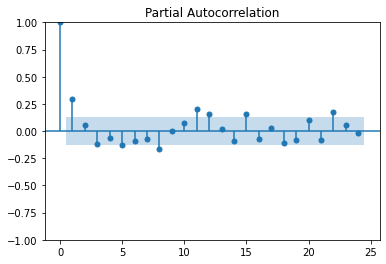

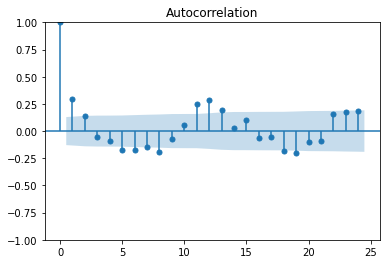

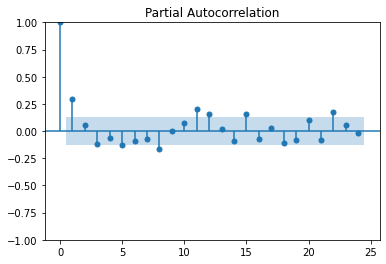

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train_data)
plot_pacf(train_data)

### AR

In [32]:
# For a first ARMA model approach we are going to select p=2 and q=2
from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(train_data, lags=48).fit()

c:\users\manuelsousa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


c:\users\manuelsousa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


<AxesSubplot:xlabel='mes'>

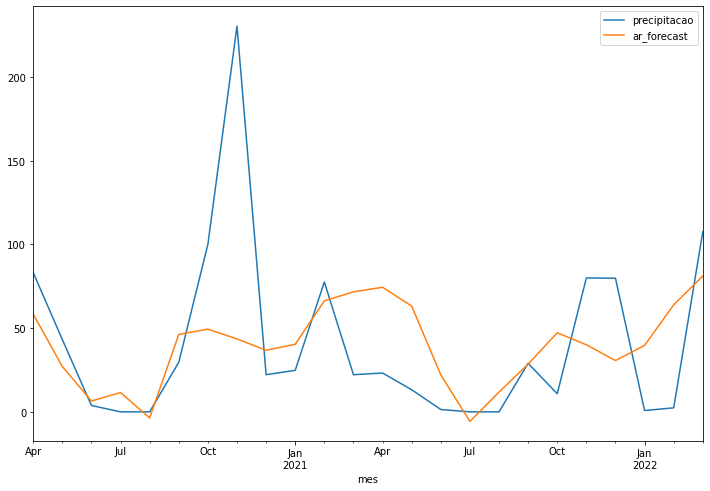

In [33]:
forecast_data = mydata
forecast_data['ar_forecast'] = ar_model.predict(start = mydata.shape[0]-fh, end=mydata.shape[0], dynamic= True)  
forecast_data[['precipitacao', 'ar_forecast']].iloc[-fh:].plot(figsize=(12, 8))

In [34]:
def evaluate(test_data, pred_data):    
    rmse = round(np.sqrt(mean_squared_error(test_data, pred_data)), 2)    
    mae = round(mean_absolute_error(test_data, pred_data),2)    
    mape = round(100*mean_absolute_percentage_error(test_data, pred_data), 2)
    print("RMSE is ", rmse)
    print("MAE is ", mae)
    print("MAPE is ", mape,'%')

In [35]:
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:           precipitacao   No. Observations:                  231
Model:                    AutoReg(48)   Log Likelihood                -971.124
Method:               Conditional MLE   S.D. of innovations             48.801
Date:                Sun, 15 May 2022   AIC                           2042.249
Time:                        09:16:17   BIC                           2202.723
Sample:                    01-01-2005   HQIC                          2107.297
                         - 03-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               29.6995     19.651      1.511      0.131      -8.815      68.214
precipitacao.L1      0.2378      0.074      3.223      0.001       0.093       0.382
precipitacao.L2      0.0627 

In [36]:
evaluate(test_data, forecast_data['ar_forecast'][-fh:])

RMSE is  49.53
MAE is  33.17
MAPE is  6.13629049775168e+17 %


### MA

c:\users\manuelsousa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\manuelsousa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\manuelsousa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\manuelsousa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<AxesSubplot:xlabel='mes'>

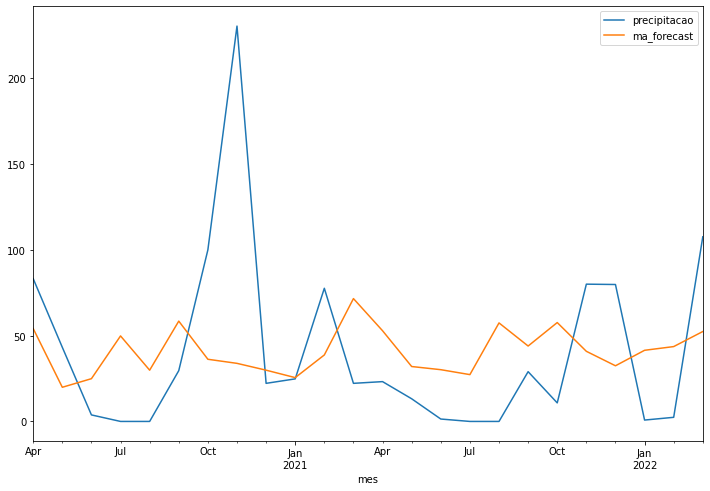

In [37]:
from statsmodels.tsa.arima.model import ARIMA
# fit model
ma_model = ARIMA(train_data, order=(0, 0, 24)).fit()
# make prediction
forecast_data['ma_forecast'] = ma_model.predict(start = mydata.shape[0]-fh, end=mydata.shape[0], dynamic= True)  
forecast_data[['precipitacao', 'ma_forecast']].iloc[-fh:].plot(figsize=(12, 8))

In [38]:
print(ma_model.summary())

                               SARIMAX Results                                
Dep. Variable:           precipitacao   No. Observations:                  231
Model:                ARIMA(0, 0, 24)   Log Likelihood               -1229.922
Date:                Sun, 15 May 2022   AIC                           2511.844
Time:                        09:16:22   BIC                           2601.347
Sample:                    01-01-2001   HQIC                          2547.944
                         - 03-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.6229      7.885      5.913      0.000      31.168      62.078
ma.L1          0.2097      0.670      0.313      0.754      -1.103       1.522
ma.L2          0.1213      0.292      0.415      0.6

In [39]:
evaluate(test_data, forecast_data['ma_forecast'][-fh:])

RMSE is  54.56
MAE is  41.09
MAPE is  3.0848837441869235e+18 %


### ARMA

<AxesSubplot:xlabel='mes'>

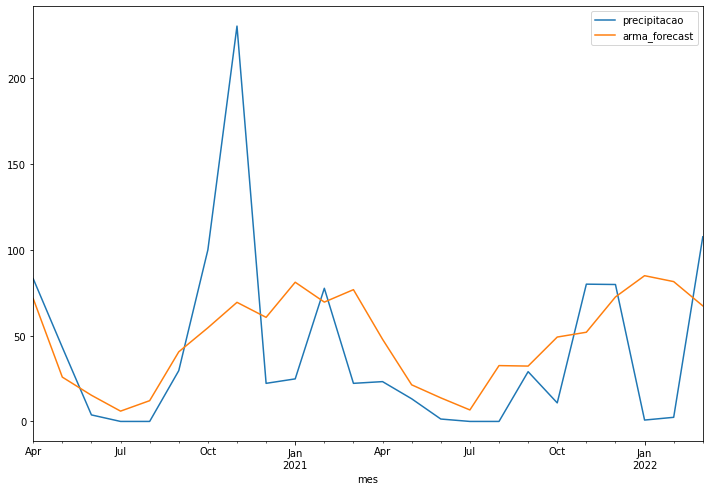

In [95]:
# fit model
arma_model = ARIMA(train_data, order=(8, 0, 8)).fit()
# make prediction
forecast_data['arma_forecast'] = arma_model.predict(start = mydata.shape[0]-fh, end=mydata.shape[0], dynamic= True)  
forecast_data[['precipitacao', 'arma_forecast']].iloc[-fh:].plot(figsize=(12, 8))

In [96]:
print(arma_model.summary())

                               SARIMAX Results                                
Dep. Variable:           precipitacao   No. Observations:                  231
Model:                 ARIMA(8, 0, 8)   Log Likelihood               -1233.462
Date:                Sun, 15 May 2022   AIC                           2502.923
Time:                        10:27:34   BIC                           2564.887
Sample:                    01-01-2001   HQIC                          2527.915
                         - 03-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.6457      7.183      6.494      0.000      32.568      60.723
ar.L1         -0.4628      0.251     -1.846      0.065      -0.954       0.029
ar.L2          0.3394      0.146      2.321      0.0

In [97]:
evaluate(test_data, forecast_data['arma_forecast'][-fh:])

RMSE is  48.2
MAE is  33.25
MAPE is  1.0759914973734547e+18 %


<AxesSubplot:xlabel='mes'>

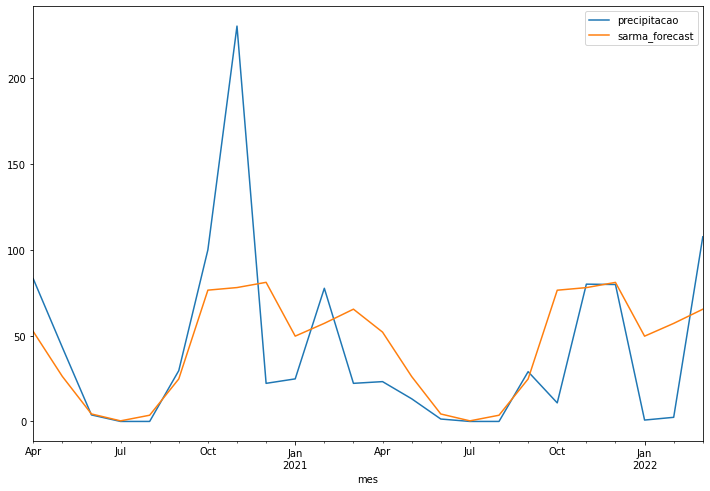

In [70]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX
# fit model
sarma_model = SARIMAX(train_data, order=(1, 0, 0), seasonal_order=(1, 0, 1, 12)).fit(disp=False)
# make prediction
forecast_data['sarma_forecast'] = sarma_model.predict(start = mydata.shape[0]-fh, end=mydata.shape[0], dynamic= True)  
forecast_data[['precipitacao', 'sarma_forecast']].iloc[-fh:].plot(figsize=(12, 8))

In [66]:
evaluate(test_data, forecast_data['sarma_forecast'][-fh:])

RMSE is  42.79
MAE is  27.0
MAPE is  1.4830862476502637e+17 %


In [45]:
print(sarma_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                         precipitacao   No. Observations:                  231
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood               -1252.866
Date:                              Sun, 15 May 2022   AIC                           2513.731
Time:                                      09:16:24   BIC                           2527.501
Sample:                                  01-01-2001   HQIC                          2519.285
                                       - 03-01-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1983      0.062      3.177      0.001       0.076       0.321
ar.S.L12       0.99

In [46]:
mydata.shape

(255, 5)

#### Experiencia de um modelo SARMAX

In [47]:
# https://www.calendarr.com/portugal/estacoes-do-ano/
    
import datetime

mydata2 = mydata
mydata2 = mydata2.reset_index()
mydata2['mes'] = pd.to_datetime(mydata2['mes'], format='%Y-%m-%d')
print(mydata2)

# primavera 1
# verao 2
# outono 3
# inverno 4

mydata2['estacoes'] = 0
mydata2['estacoes'].loc[(mydata2['mes'].dt.month >= 4) & (mydata2['mes'].dt.month <= 6)] = 1
mydata2['estacoes'].loc[(mydata2['mes'].dt.month >= 7) & (mydata2['mes'].dt.month <= 9)] = 2
mydata2['estacoes'].loc[(mydata2['mes'].dt.month >= 10) & (mydata2['mes'].dt.month <= 12)] = 3
mydata2['estacoes'].loc[(mydata2['mes'].dt.month >= 1) & (mydata2['mes'].dt.month <= 3)] = 4
print(mydata2)

           mes  precipitacao  ar_forecast  ma_forecast  arma_forecast  \
0   2001-01-01         135.9          NaN          NaN            NaN   
1   2001-02-01          68.7          NaN          NaN            NaN   
2   2001-03-01         138.8          NaN          NaN            NaN   
3   2001-04-01           3.6          NaN          NaN            NaN   
4   2001-05-01           9.8          NaN          NaN            NaN   
..         ...           ...          ...          ...            ...   
250 2021-11-01          80.0    40.062410    40.864232      57.184166   
251 2021-12-01          79.8    30.633710    32.434554      74.862456   
252 2022-01-01           0.8    39.699416    41.460615      75.505860   
253 2022-02-01           2.4    63.906211    43.621318      65.044195   
254 2022-03-01         107.6    81.113995    52.400628      63.150705   

     sarma_forecast  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4            

c:\users\manuelsousa\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [51]:
mydata2

,mes,precipitacao,ar_forecast,ma_forecast,arma_forecast,sarma_forecast,estacoes
0,2001-01-01,135.9,NaN,NaN,NaN,NaN,4
1,2001-02-01,68.7,NaN,NaN,NaN,NaN,4
2,2001-03-01,138.8,NaN,NaN,NaN,NaN,4
3,2001-04-01,3.6,NaN,NaN,NaN,NaN,1
4,2001-05-01,9.8,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...
250,2021-11-01,80.0,40.062410,40.864232,57.184166,77.980960,3
251,2021-12-01,79.8,30.633710,32.434554,74.862456,81.027715,3
252,2022-01-01,0.8,39.699416,41.460615,75.505860,49.686103,4
253,2022-02-01,2.4,63.906211,43.621318,65.044195,57.140572,4


In [52]:
mydata2 = mydata2.drop(['ar_forecast', 'ma_forecast', 'arma_forecast', 'sarma_forecast'], axis=1)
mydata2

,mes,precipitacao,estacoes
0,2001-01-01,135.9,4
1,2001-02-01,68.7,4
2,2001-03-01,138.8,4
3,2001-04-01,3.6,1
4,2001-05-01,9.8,1
...,...,...,...
250,2021-11-01,80.0,3
251,2021-12-01,79.8,3
252,2022-01-01,0.8,4
253,2022-02-01,2.4,4


In [53]:
data_size = mydata2.shape[0]
train_data_x = mydata2.iloc[:(data_size - fh)]
test_data_x = mydata2.iloc[(data_size - fh):]
print(mydata2.shape, train_data_x.shape, test_data_x.shape)

(255, 3) (231, 3) (24, 3)


In [54]:
train_data_x = train_data_x.set_index('mes')
test_data_x = test_data_x.set_index('mes')

In [55]:
test_data_x

,precipitacao,estacoes
mes,,
2020-04-01,83.2,1
2020-05-01,43.2,1
2020-06-01,3.8,1
2020-07-01,0.0,2
2020-08-01,0.0,2
2020-09-01,29.6,2
2020-10-01,100.0,3
2020-11-01,230.4,3
2020-12-01,22.2,3


c:\users\manuelsousa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\manuelsousa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\manuelsousa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<AxesSubplot:xlabel='mes'>

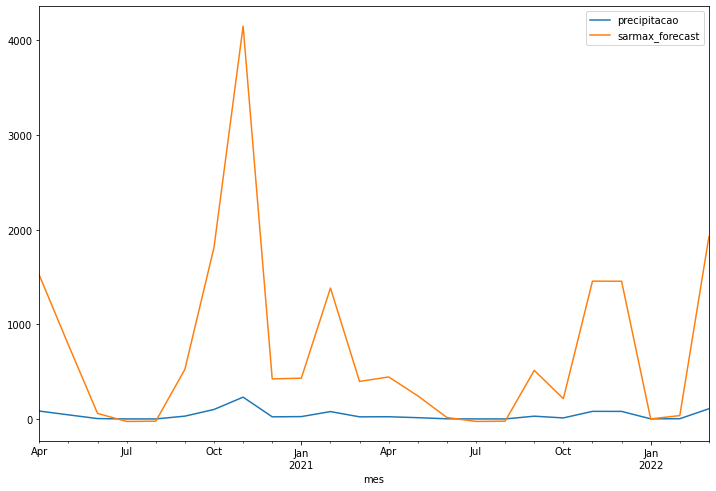

In [56]:
# fit model
sarmax_model = SARIMAX(train_data_x['precipitacao'], exog=train_data_x['estacoes'], order=(1, 0, 0), seasonal_order=(1, 0, 1, 12)).fit(disp=False)
# make prediction
# exog_forecast = mydata2.loc[230:255,['estacoes']
# print(exog_forecast)
forecast_data['sarmax_forecast'] = sarmax_model.predict(start=231, end=254, exog=test_data_x['precipitacao'], dynamic=True)  
forecast_data[['precipitacao', 'sarmax_forecast']].iloc[-fh:].plot(figsize=(12, 8))

In [57]:
forecast_data

,precipitacao,ar_forecast,ma_forecast,arma_forecast,sarma_forecast,sarmax_forecast
mes,,,,,,
2001-01-01,135.9,NaN,NaN,NaN,NaN,NaN
2001-02-01,68.7,NaN,NaN,NaN,NaN,NaN
2001-03-01,138.8,NaN,NaN,NaN,NaN,NaN
2001-04-01,3.6,NaN,NaN,NaN,NaN,NaN
2001-05-01,9.8,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-11-01,80.0,40.062410,40.864232,57.184166,77.980960,1456.280516
2021-12-01,79.8,30.633710,32.434554,74.862456,81.027715,1455.196679
2022-01-01,0.8,39.699416,41.460615,75.505860,49.686103,0.530276


In [58]:
evaluate(test_data_x['precipitacao'], forecast_data['sarmax_forecast'][-fh:])

RMSE is  1135.52
MAE is  704.25
MAPE is  1.8803960101941404e+18 %


# Model Best Tuning Search
Using auto_arima function and brute force method

### Using auto_arima

In [59]:
# pip install pmdarima
import pmdarima as pm

stepwise_model = pm.auto_arima(train_data, start_p=0, start_q=0,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=0, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=2529.023, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2542.798, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2514.327, Time=0.21 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2519.828, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2653.173, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2523.219, Time=0.06 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=2514.301, Time=0.90 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=2515.895, Time=0.91 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=2505.046, Time=0.47 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2516.571, Time=0.18 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=2516.560, Time=0.50 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=2514.496, Time=0.40 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,0,0)(1,0,1)[12] inte

### Using brute force

In [60]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [61]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2639.414915846181
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2453.4097566218607
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2472.82362329684
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2243.284088590084
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2425.3634367050245
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2368.521128875233
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2312.0937604965247
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2244.2290677132396
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2576.810853603235
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2418.3344884126464
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2461.878095103145
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2231.3510754967974
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2416.6864730752964
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2357.2508125069944
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2310.471511383147
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2231.8474257811167
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2595.9786792085506
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2